In [43]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.integrate import simps
from pathlib import Path

In [42]:
DATA_PATH = Path("data_2013")
raw = mne.io.read_raw_edf(DATA_PATH / "SC4001E0-PSG.edf", preload=True)
label = np.load(DATA_PATH / "SC4001EC-Hypnogram.npy")

print(len(label) == len(raw) // (100 * 30))
print(f"RAW DATA : {raw}")
print(f"RAW INFO : {raw.info}")
print(f"RAW CHANNELS : {raw.ch_names}")

Extracting EDF parameters from C:\Users\jjm\Desktop\Git_store\medical\example\1_library\data_2013\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...
True
RAW DATA : <RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MB, data loaded>
RAW INFO : <Info | 7 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
>
RAW CHANNELS : ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


In [59]:
data = raw['EEG Fpz-Cz'][0][0][0*3000:1*3000]

sf = 100.
time = np.arange(len(data)) / 100

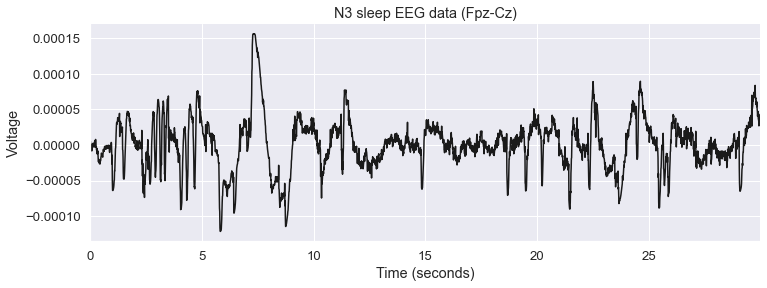

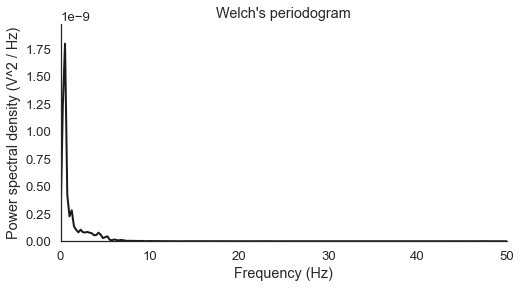

In [60]:
sns.set(font_scale=1.2)

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('N3 sleep EEG data (Fpz-Cz)')
sns.despine()

# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(data, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

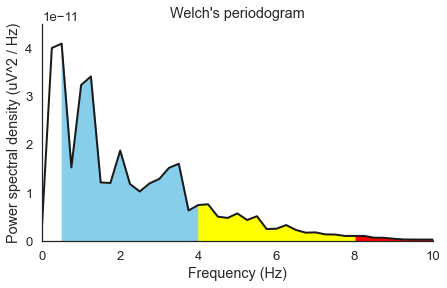

Relative delta power: 0.617
Relative alpha power: 0.023
Relative theta power: 0.150


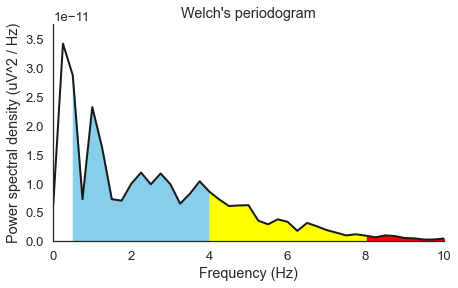

Relative delta power: 0.540
Relative alpha power: 0.027
Relative theta power: 0.201


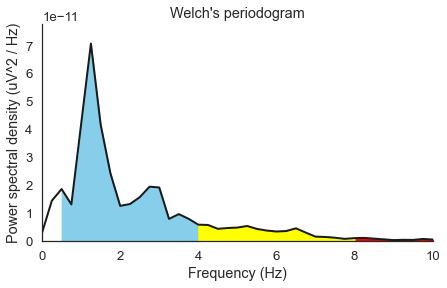

Relative delta power: 0.746
Relative alpha power: 0.023
Relative theta power: 0.138


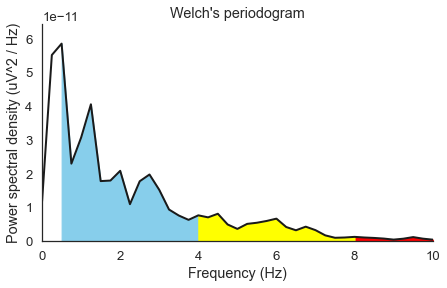

Relative delta power: 0.583
Relative alpha power: 0.023
Relative theta power: 0.154


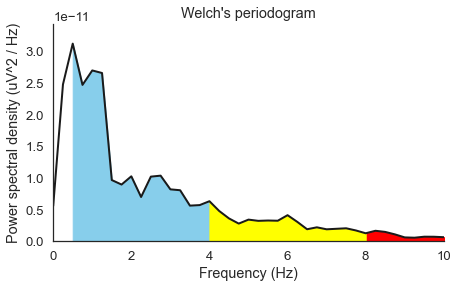

Relative delta power: 0.609
Relative alpha power: 0.037
Relative theta power: 0.157


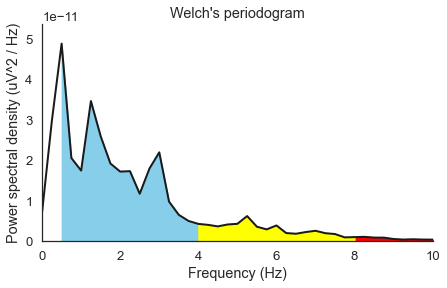

Relative delta power: 0.666
Relative alpha power: 0.023
Relative theta power: 0.130


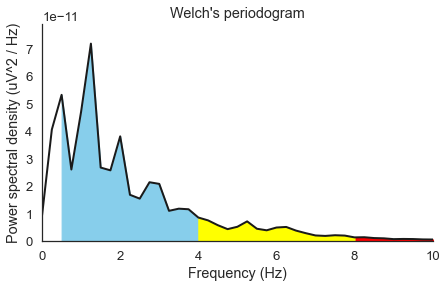

Relative delta power: 0.683
Relative alpha power: 0.024
Relative theta power: 0.128


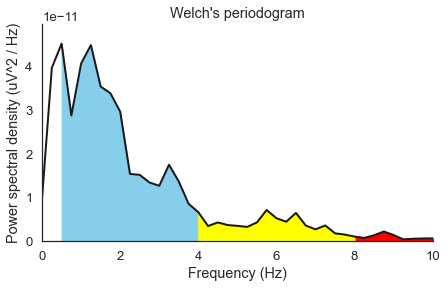

Relative delta power: 0.678
Relative alpha power: 0.026
Relative theta power: 0.128


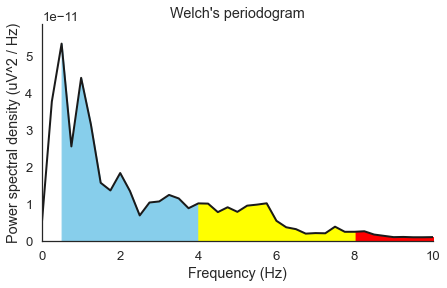

Relative delta power: 0.547
Relative alpha power: 0.042
Relative theta power: 0.216


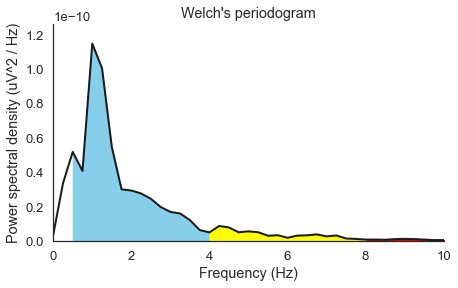

Relative delta power: 0.766
Relative alpha power: 0.020
Relative theta power: 0.100


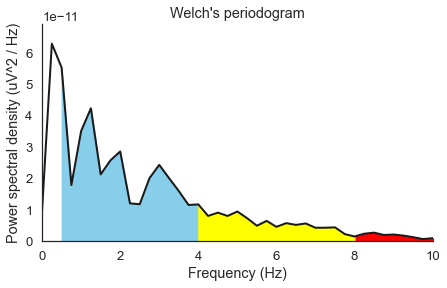

Relative delta power: 0.570
Relative alpha power: 0.038
Relative theta power: 0.176


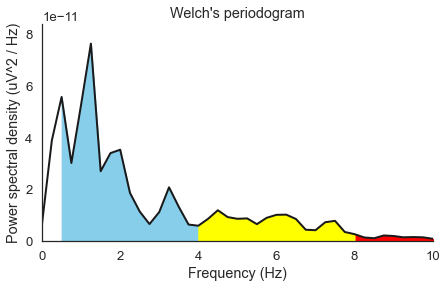

Relative delta power: 0.622
Relative alpha power: 0.032
Relative theta power: 0.203


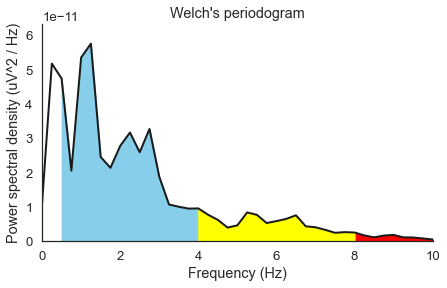

Relative delta power: 0.646
Relative alpha power: 0.027
Relative theta power: 0.150


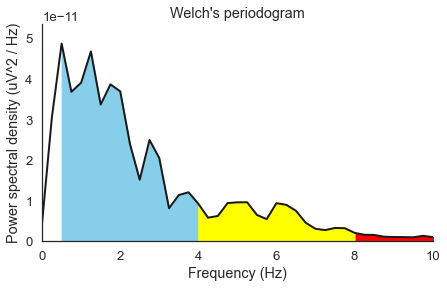

Relative delta power: 0.670
Relative alpha power: 0.028
Relative theta power: 0.178


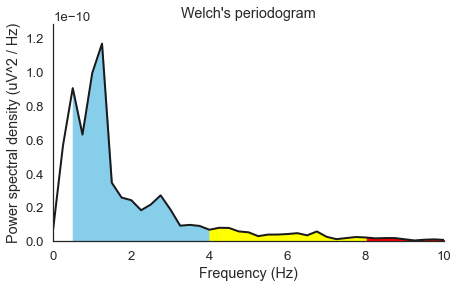

Relative delta power: 0.721
Relative alpha power: 0.021
Relative theta power: 0.095


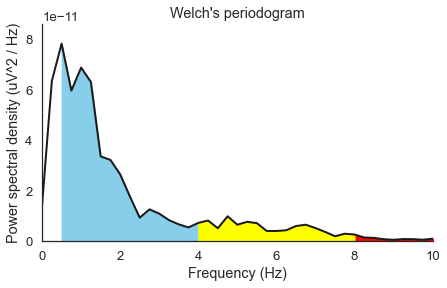

Relative delta power: 0.635
Relative alpha power: 0.021
Relative theta power: 0.145


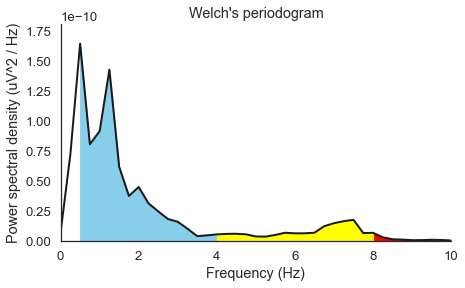

Relative delta power: 0.672
Relative alpha power: 0.019
Relative theta power: 0.137


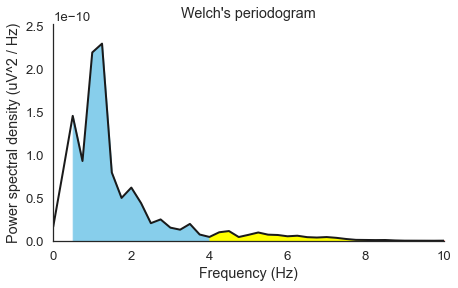

Relative delta power: 0.772
Relative alpha power: 0.009
Relative theta power: 0.080


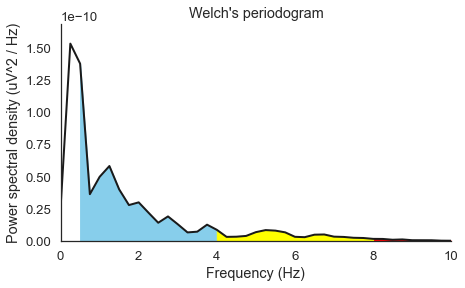

Relative delta power: 0.528
Relative alpha power: 0.016
Relative theta power: 0.101


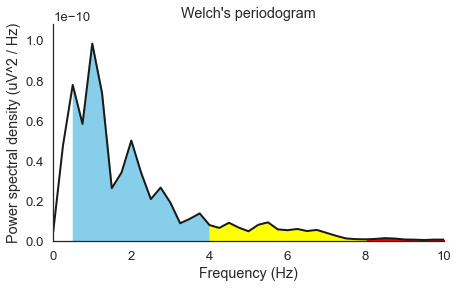

Relative delta power: 0.718
Relative alpha power: 0.017
Relative theta power: 0.122


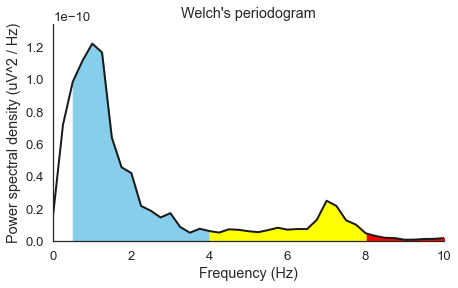

Relative delta power: 0.666
Relative alpha power: 0.025
Relative theta power: 0.162


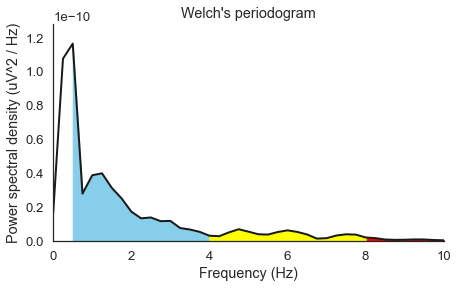

Relative delta power: 0.517
Relative alpha power: 0.023
Relative theta power: 0.119


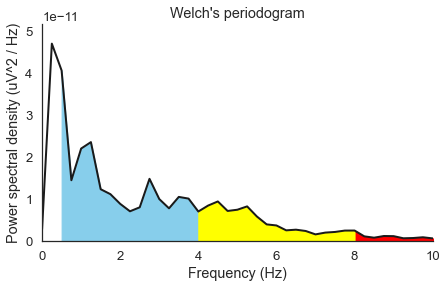

Relative delta power: 0.510
Relative alpha power: 0.034
Relative theta power: 0.211


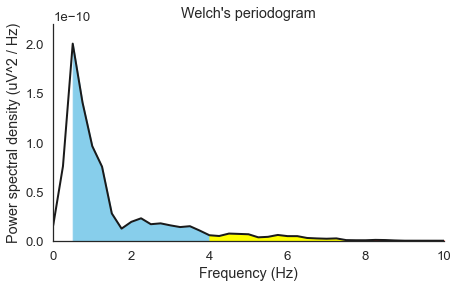

Relative delta power: 0.687
Relative alpha power: 0.013
Relative theta power: 0.082


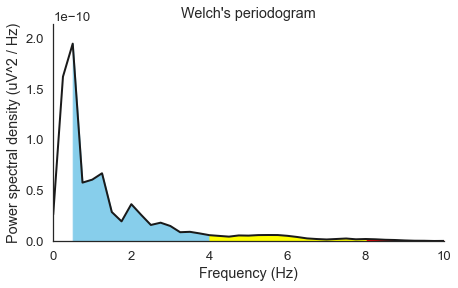

Relative delta power: 0.542
Relative alpha power: 0.015
Relative theta power: 0.081


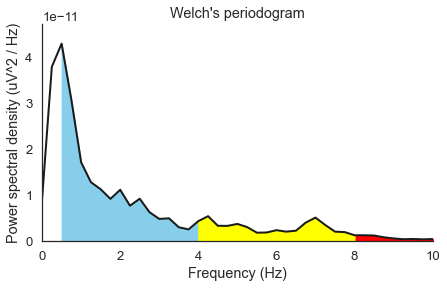

Relative delta power: 0.531
Relative alpha power: 0.033
Relative theta power: 0.173


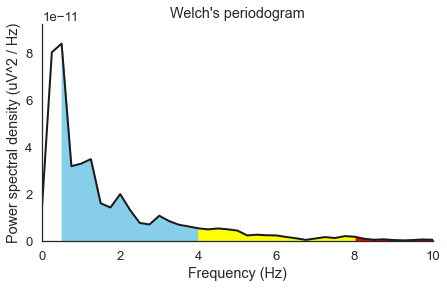

Relative delta power: 0.553
Relative alpha power: 0.021
Relative theta power: 0.098


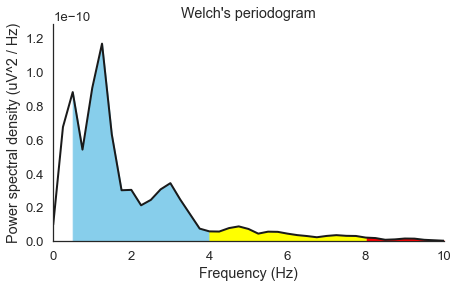

Relative delta power: 0.720
Relative alpha power: 0.020
Relative theta power: 0.093


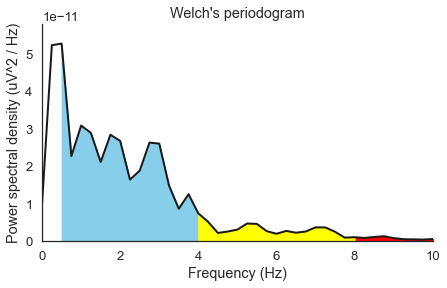

Relative delta power: 0.658
Relative alpha power: 0.022
Relative theta power: 0.107


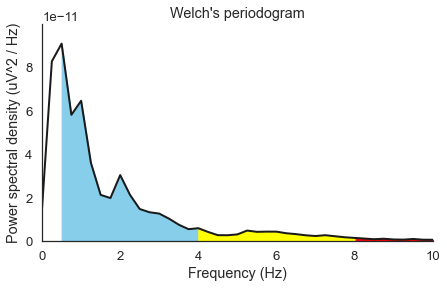

Relative delta power: 0.614
Relative alpha power: 0.021
Relative theta power: 0.095


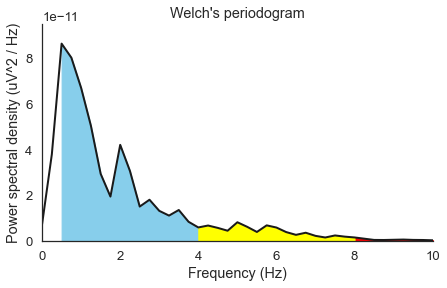

Relative delta power: 0.721
Relative alpha power: 0.015
Relative theta power: 0.118


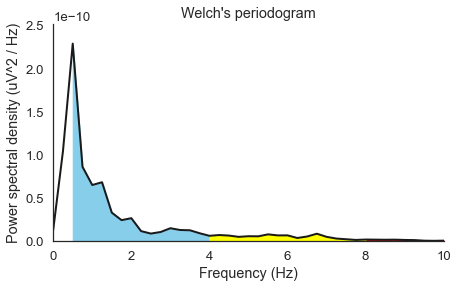

Relative delta power: 0.591
Relative alpha power: 0.021
Relative theta power: 0.105


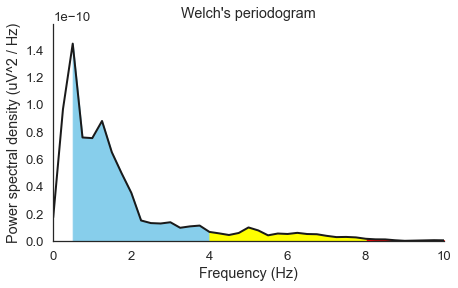

Relative delta power: 0.657
Relative alpha power: 0.013
Relative theta power: 0.102


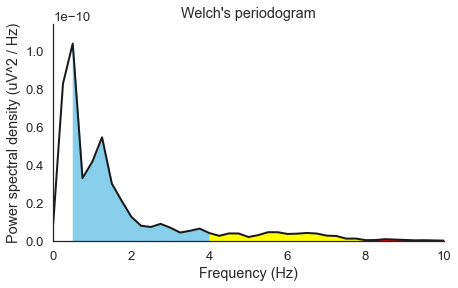

Relative delta power: 0.570
Relative alpha power: 0.017
Relative theta power: 0.106


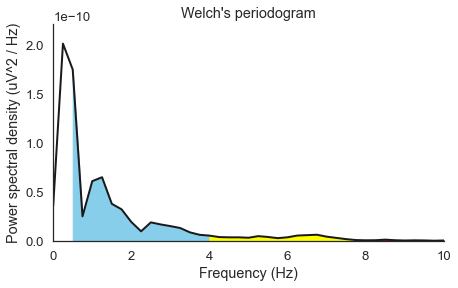

Relative delta power: 0.482
Relative alpha power: 0.014
Relative theta power: 0.082


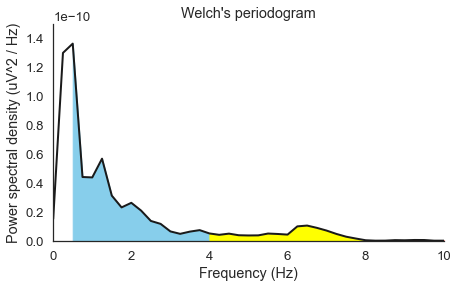

Relative delta power: 0.524
Relative alpha power: 0.014
Relative theta power: 0.128


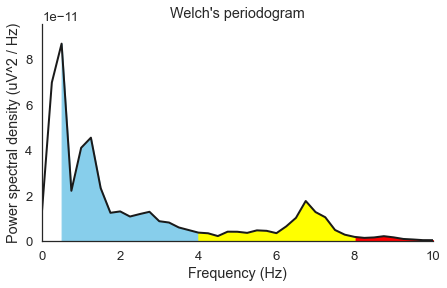

Relative delta power: 0.503
Relative alpha power: 0.028
Relative theta power: 0.201


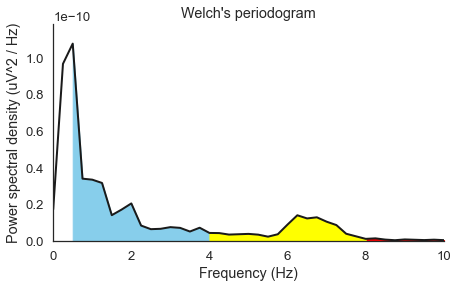

Relative delta power: 0.453
Relative alpha power: 0.021
Relative theta power: 0.194


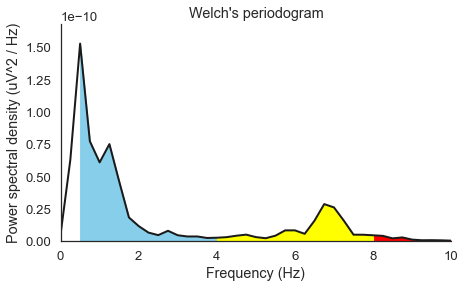

Relative delta power: 0.551
Relative alpha power: 0.028
Relative theta power: 0.205


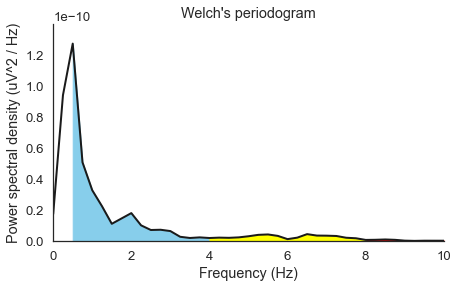

Relative delta power: 0.506
Relative alpha power: 0.016
Relative theta power: 0.099


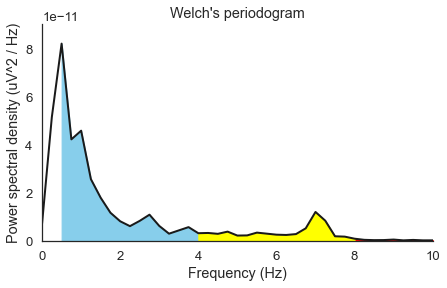

Relative delta power: 0.565
Relative alpha power: 0.017
Relative theta power: 0.154


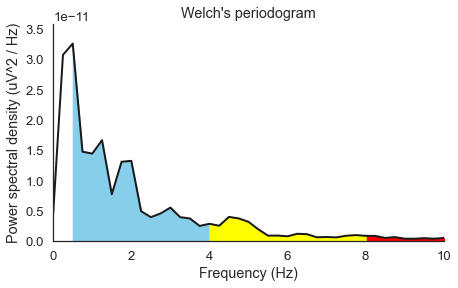

Relative delta power: 0.566
Relative alpha power: 0.036
Relative theta power: 0.119


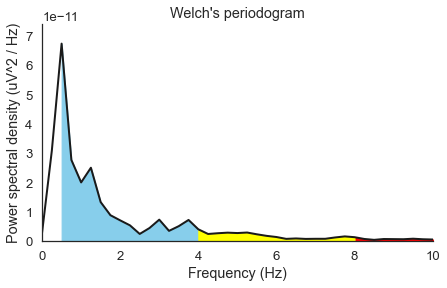

Relative delta power: 0.598
Relative alpha power: 0.033
Relative theta power: 0.103


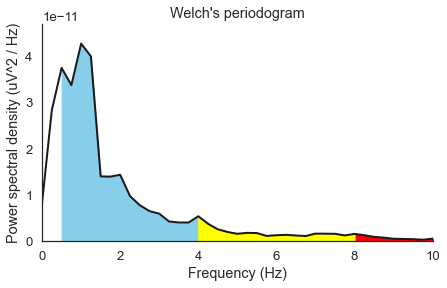

Relative delta power: 0.678
Relative alpha power: 0.032
Relative theta power: 0.089


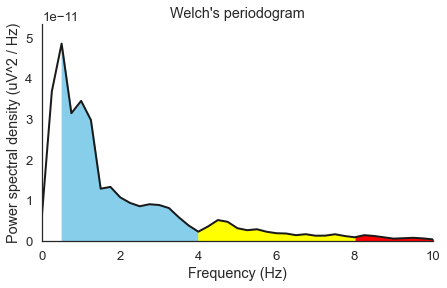

Relative delta power: 0.622
Relative alpha power: 0.036
Relative theta power: 0.116


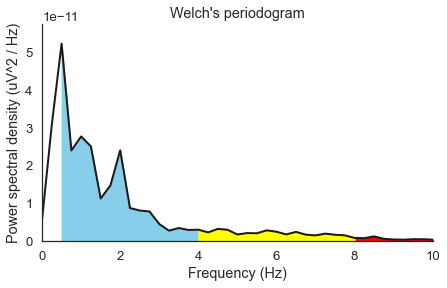

Relative delta power: 0.618
Relative alpha power: 0.029
Relative theta power: 0.117


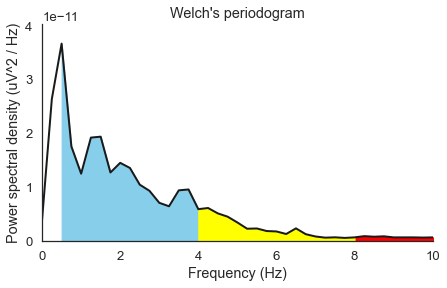

Relative delta power: 0.622
Relative alpha power: 0.041
Relative theta power: 0.133


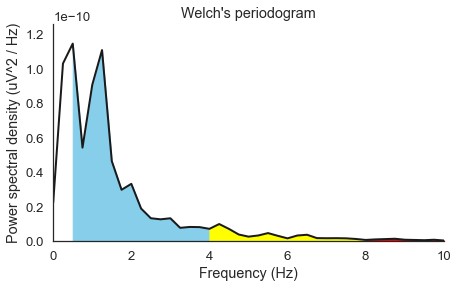

Relative delta power: 0.655
Relative alpha power: 0.017
Relative theta power: 0.074


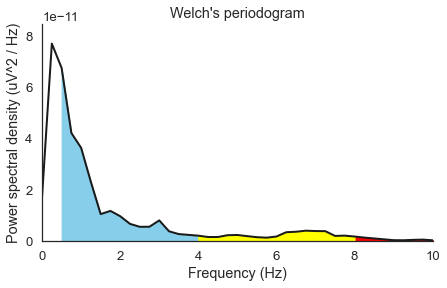

Relative delta power: 0.514
Relative alpha power: 0.025
Relative theta power: 0.106


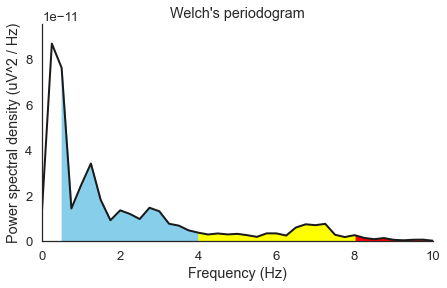

Relative delta power: 0.482
Relative alpha power: 0.026
Relative theta power: 0.143


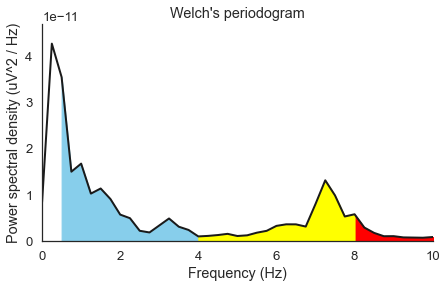

Relative delta power: 0.398
Relative alpha power: 0.058
Relative theta power: 0.241


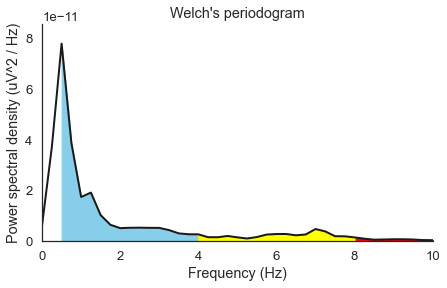

Relative delta power: 0.560
Relative alpha power: 0.030
Relative theta power: 0.127


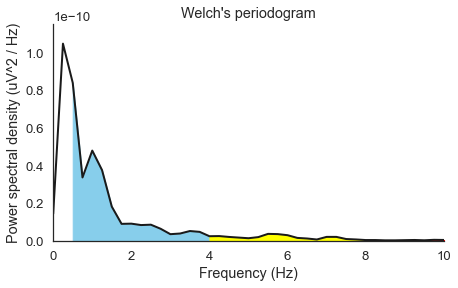

Relative delta power: 0.509
Relative alpha power: 0.018
Relative theta power: 0.075


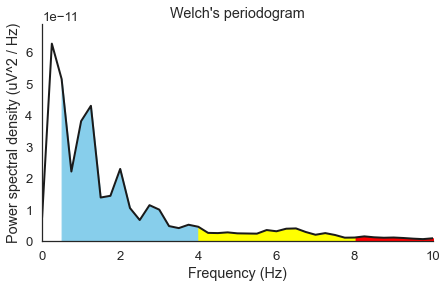

Relative delta power: 0.567
Relative alpha power: 0.036
Relative theta power: 0.108


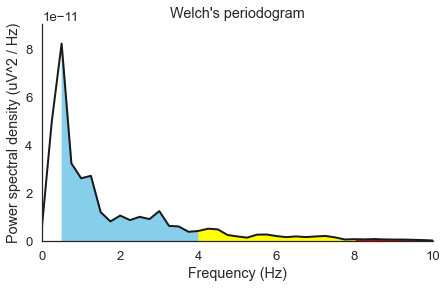

Relative delta power: 0.575
Relative alpha power: 0.025
Relative theta power: 0.105


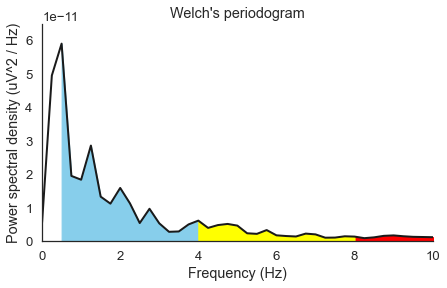

Relative delta power: 0.514
Relative alpha power: 0.060
Relative theta power: 0.123


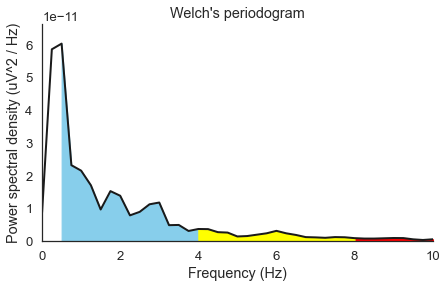

Relative delta power: 0.537
Relative alpha power: 0.029
Relative theta power: 0.098


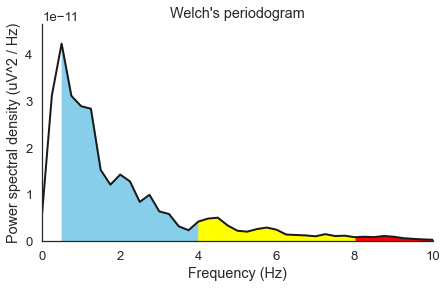

Relative delta power: 0.628
Relative alpha power: 0.035
Relative theta power: 0.115


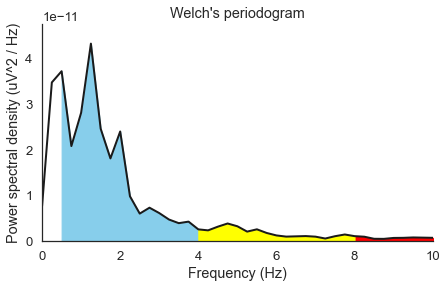

Relative delta power: 0.666
Relative alpha power: 0.027
Relative theta power: 0.090


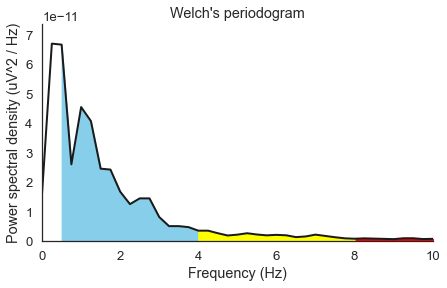

Relative delta power: 0.609
Relative alpha power: 0.026
Relative theta power: 0.076


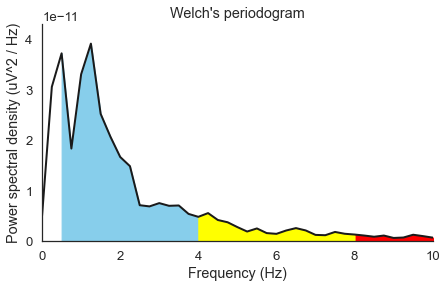

Relative delta power: 0.657
Relative alpha power: 0.036
Relative theta power: 0.114


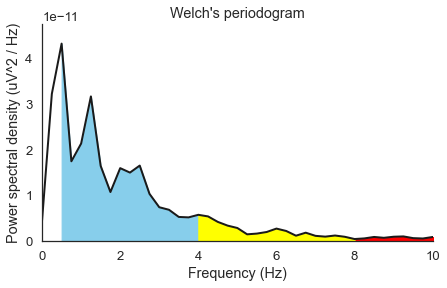

Relative delta power: 0.633
Relative alpha power: 0.036
Relative theta power: 0.116


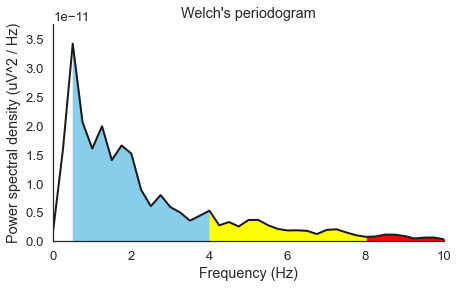

Relative delta power: 0.640
Relative alpha power: 0.042
Relative theta power: 0.142


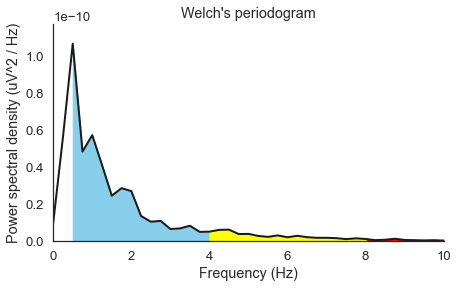

Relative delta power: 0.646
Relative alpha power: 0.023
Relative theta power: 0.093


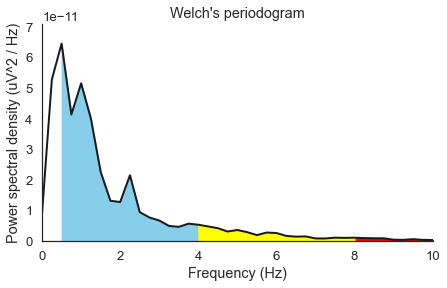

Relative delta power: 0.641
Relative alpha power: 0.022
Relative theta power: 0.090


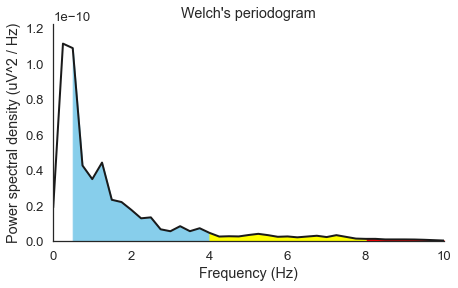

Relative delta power: 0.535
Relative alpha power: 0.023
Relative theta power: 0.082


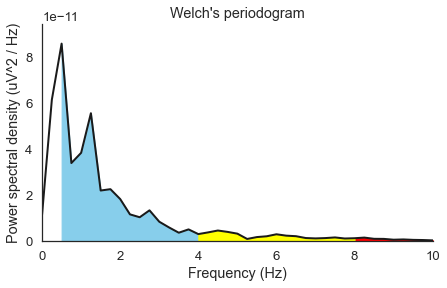

Relative delta power: 0.633
Relative alpha power: 0.025
Relative theta power: 0.079


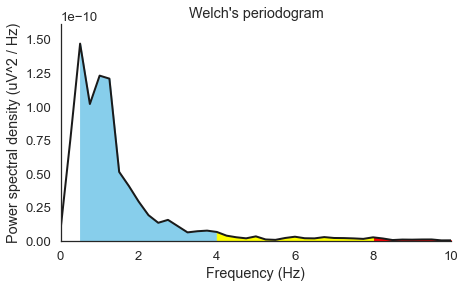

Relative delta power: 0.744
Relative alpha power: 0.017
Relative theta power: 0.049


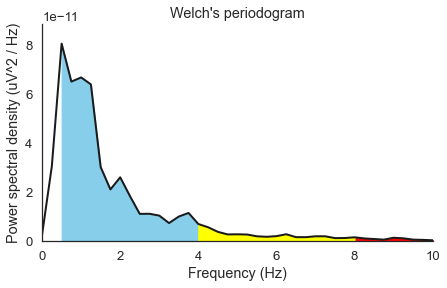

Relative delta power: 0.743
Relative alpha power: 0.023
Relative theta power: 0.078


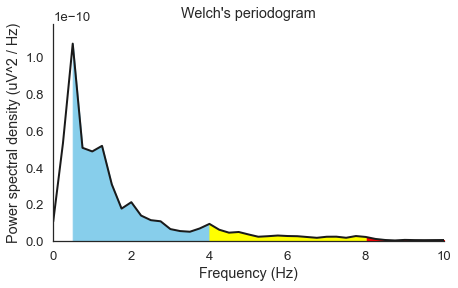

Relative delta power: 0.640
Relative alpha power: 0.023
Relative theta power: 0.104


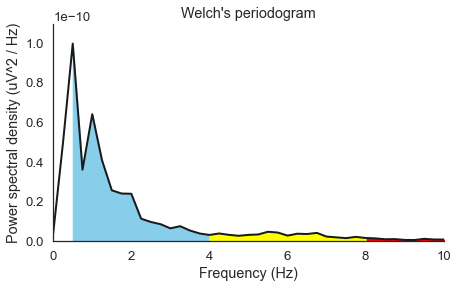

Relative delta power: 0.627
Relative alpha power: 0.027
Relative theta power: 0.108


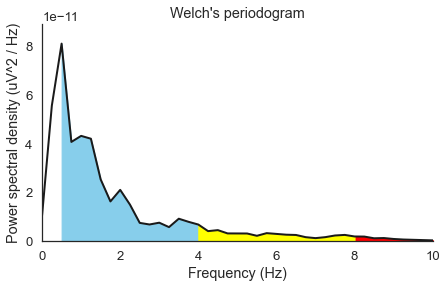

Relative delta power: 0.620
Relative alpha power: 0.031
Relative theta power: 0.100


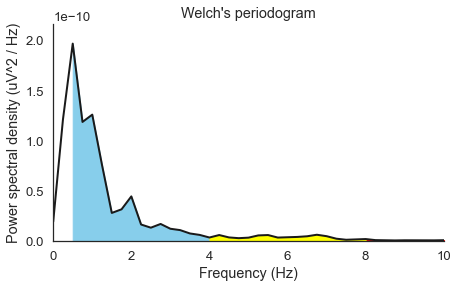

Relative delta power: 0.642
Relative alpha power: 0.017
Relative theta power: 0.073


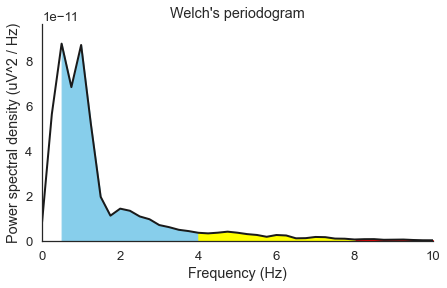

Relative delta power: 0.677
Relative alpha power: 0.018
Relative theta power: 0.078


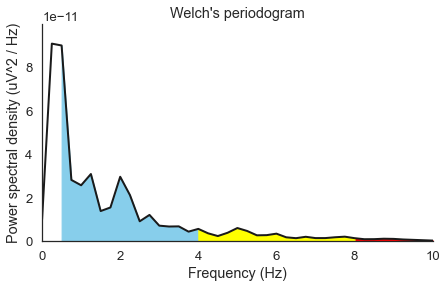

Relative delta power: 0.533
Relative alpha power: 0.021
Relative theta power: 0.096


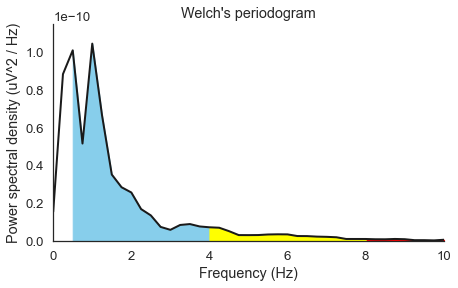

Relative delta power: 0.646
Relative alpha power: 0.018
Relative theta power: 0.081


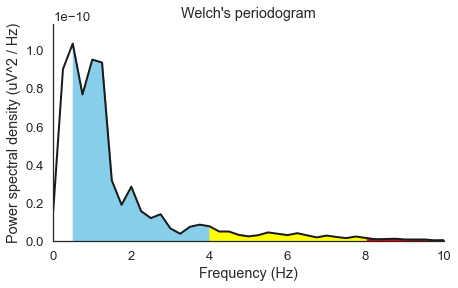

Relative delta power: 0.665
Relative alpha power: 0.017
Relative theta power: 0.077


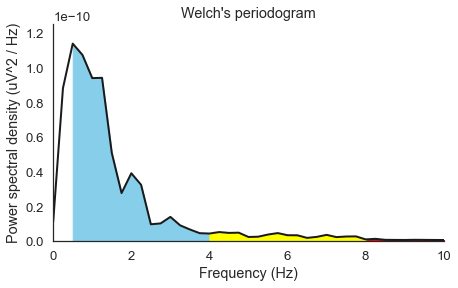

Relative delta power: 0.707
Relative alpha power: 0.013
Relative theta power: 0.070


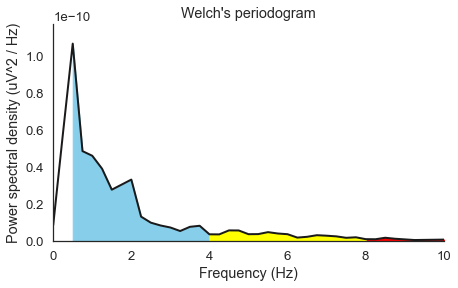

Relative delta power: 0.626
Relative alpha power: 0.024
Relative theta power: 0.106


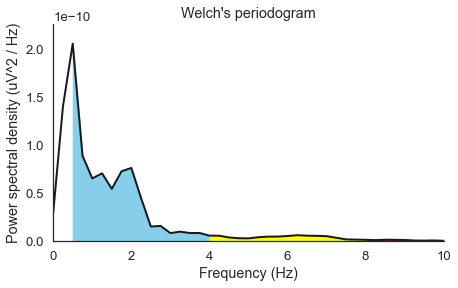

Relative delta power: 0.639
Relative alpha power: 0.015
Relative theta power: 0.070


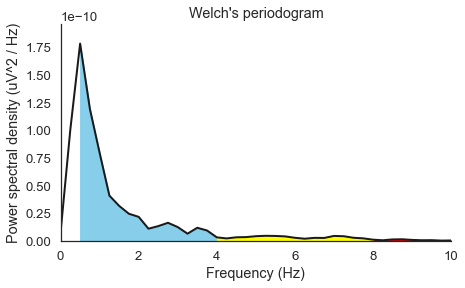

Relative delta power: 0.635
Relative alpha power: 0.020
Relative theta power: 0.076


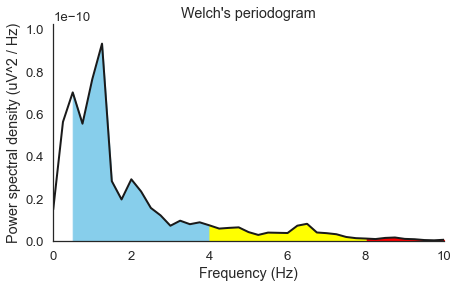

Relative delta power: 0.685
Relative alpha power: 0.021
Relative theta power: 0.115


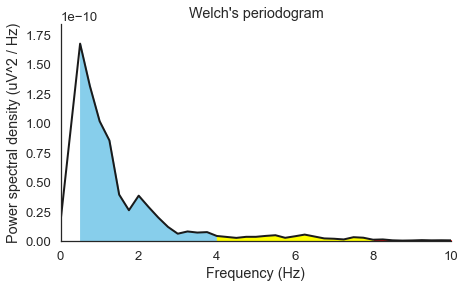

Relative delta power: 0.698
Relative alpha power: 0.014
Relative theta power: 0.065


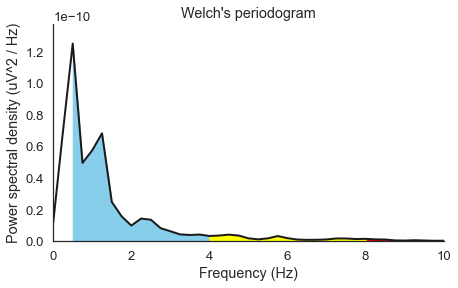

Relative delta power: 0.640
Relative alpha power: 0.016
Relative theta power: 0.063


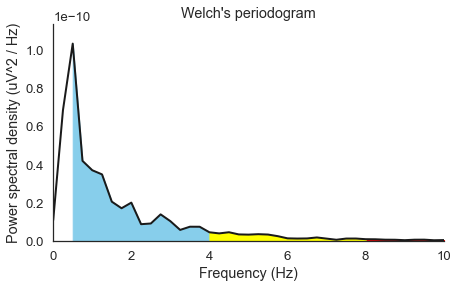

Relative delta power: 0.591
Relative alpha power: 0.024
Relative theta power: 0.084


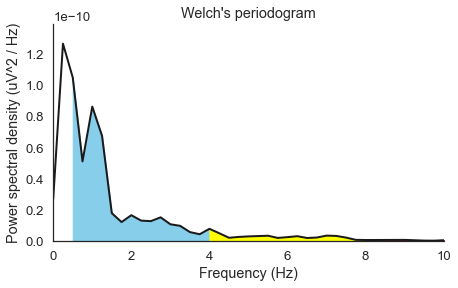

Relative delta power: 0.571
Relative alpha power: 0.014
Relative theta power: 0.073


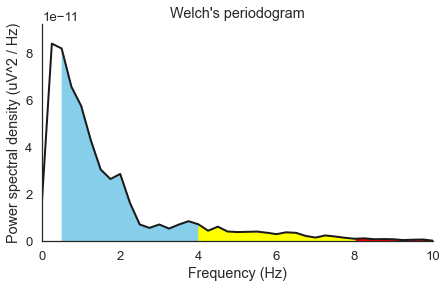

Relative delta power: 0.613
Relative alpha power: 0.019
Relative theta power: 0.095


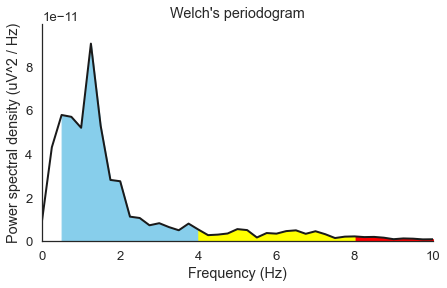

Relative delta power: 0.712
Relative alpha power: 0.029
Relative theta power: 0.102


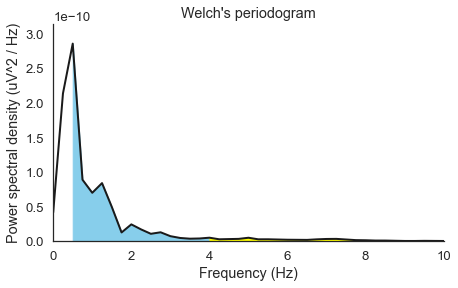

Relative delta power: 0.527
Relative alpha power: 0.009
Relative theta power: 0.047


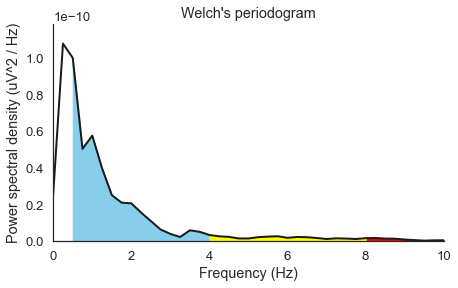

Relative delta power: 0.563
Relative alpha power: 0.022
Relative theta power: 0.060


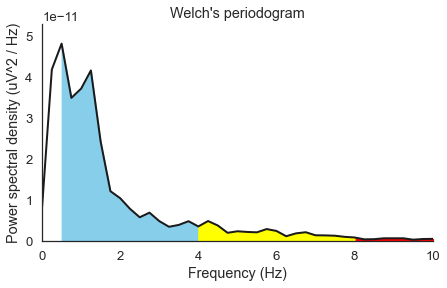

Relative delta power: 0.641
Relative alpha power: 0.023
Relative theta power: 0.104


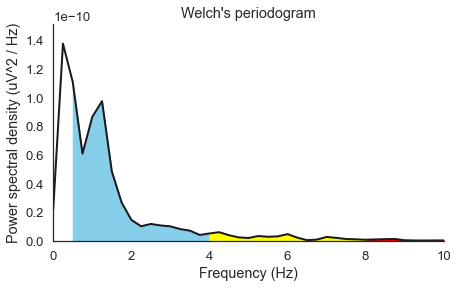

Relative delta power: 0.605
Relative alpha power: 0.016
Relative theta power: 0.063


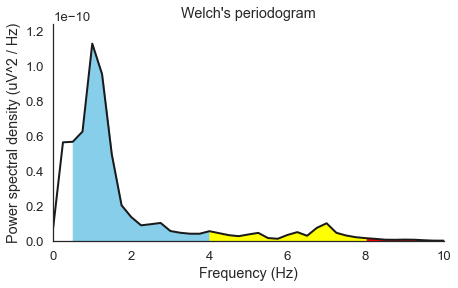

Relative delta power: 0.703
Relative alpha power: 0.017
Relative theta power: 0.111


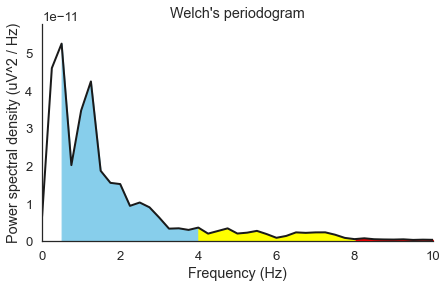

Relative delta power: 0.624
Relative alpha power: 0.020
Relative theta power: 0.097


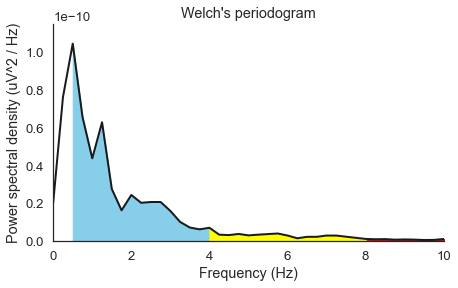

Relative delta power: 0.653
Relative alpha power: 0.020
Relative theta power: 0.079


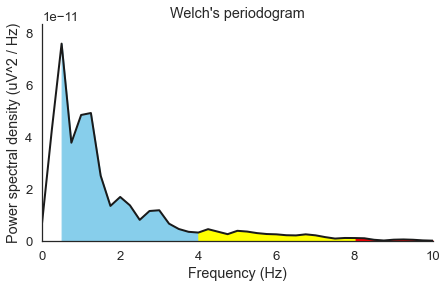

Relative delta power: 0.663
Relative alpha power: 0.018
Relative theta power: 0.101


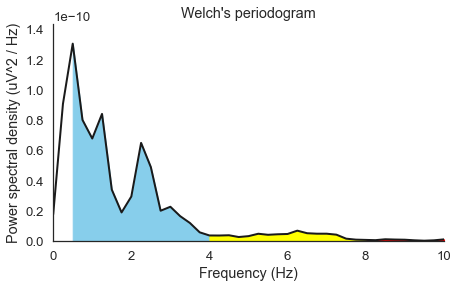

Relative delta power: 0.691
Relative alpha power: 0.014
Relative theta power: 0.079


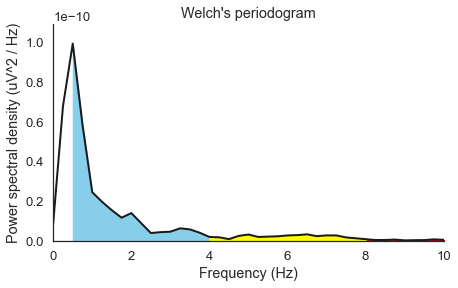

Relative delta power: 0.554
Relative alpha power: 0.027
Relative theta power: 0.093


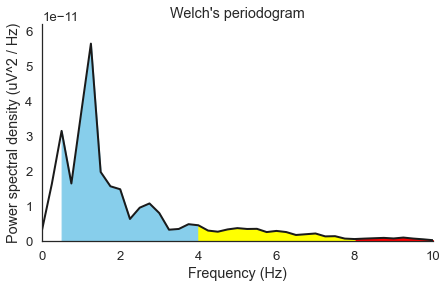

Relative delta power: 0.715
Relative alpha power: 0.030
Relative theta power: 0.127


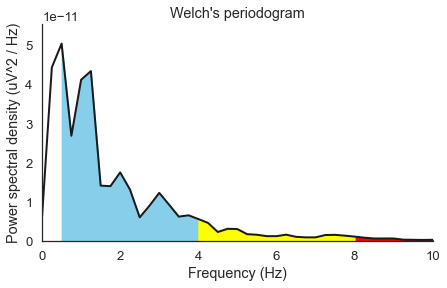

Relative delta power: 0.652
Relative alpha power: 0.024
Relative theta power: 0.086


In [75]:
for i in np.where(label == 2)[0][:100]:
    data = raw['EEG Pz-Oz'][0][0][i*3000:(i+1)*3000]

    sf = 100.
    time = np.arange(len(data)) / 100

    win = 4 * sf
    freqs, psd = signal.welch(data, sf, nperseg=win)

    delta_low, delta_high = 0.5, 4
    alpha_low, alpha_high = 8, 12
    theta_low, theta_high = 4, 8

    # Find intersecting values in frequency vector
    idx_delta = np.logical_and(freqs >= delta_low, freqs <= delta_high)
    idx_alpha = np.logical_and(freqs >= alpha_low, freqs <= alpha_high)
    idx_theta = np.logical_and(freqs >= theta_low, freqs <= theta_high)

    # Plot the power spectral density and fill the delta area
    plt.figure(figsize=(7, 4))
    plt.plot(freqs, psd, lw=2, color='k')
    plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
    plt.fill_between(freqs, psd, where=idx_alpha, color='red')
    plt.fill_between(freqs, psd, where=idx_theta, color='yellow')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (uV^2 / Hz)')
    plt.xlim([0, 10])
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Welch's periodogram")
    sns.despine()
    plt.show()

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

    # Compute the absolute power by approximating the area under the curve
    delta_power = simps(psd[idx_delta], dx=freq_res)
    alpha_power = simps(psd[idx_alpha], dx=freq_res)
    theta_power = simps(psd[idx_theta], dx=freq_res)
    # print('Absolute delta power: %.3f uV^2' % delta_power)

    # Relative delta power (expressed as a percentage of total power)
    total_power = simps(psd, dx=freq_res)
    delta_rel_power = delta_power / total_power
    alpha_rel_power = alpha_power / total_power
    theta_rel_power = theta_power / total_power
    print('Relative delta power: %.3f' % delta_rel_power)
    print('Relative alpha power: %.3f' % alpha_rel_power)
    print('Relative theta power: %.3f' % theta_rel_power)

In [37]:
def bandpower(data, sf, band, window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp

In [38]:
# Define the duration of the window to be 4 seconds
win_sec = 4

# Delta/beta ratio based on the absolute power
db = bandpower(data, sf, [0.5, 4], win_sec) / bandpower(data, sf, [12, 30], win_sec)

# Delta/beta ratio based on the relative power
db_rel = bandpower(data, sf, [0.5, 4], win_sec, True) / bandpower(data, sf, [12, 30], win_sec, True)

print('Delta/beta ratio (absolute): %.3f' % db)
print('Delta/beta ratio (relative): %.3f' % db_rel)

Delta/beta ratio (absolute): 160.311
Delta/beta ratio (relative): 160.311


In [39]:
def bandpower(data, sf, band, method='welch', window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Requires MNE-Python >= 0.14.

    Parameters
    ----------
    data : 1d-array
      Input signal in the time-domain.
    sf : float
      Sampling frequency of the data.
    band : list
      Lower and upper frequencies of the band of interest.
    method : string
      Periodogram method: 'welch' or 'multitaper'
    window_sec : float
      Length of each window in seconds. Useful only if method == 'welch'.
      If None, window_sec = (1 / min(band)) * 2.
    relative : boolean
      If True, return the relative power (= divided by the total power of the signal).
      If False (default), return the absolute power.

    Return
    ------
    bp : float
      Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    from mne.time_frequency import psd_array_multitaper

    band = np.asarray(band)
    low, high = band

    # Compute the modified periodogram (Welch)
    if method == 'welch':
        if window_sec is not None:
            nperseg = window_sec * sf
        else:
            nperseg = (2 / low) * sf

        freqs, psd = welch(data, sf, nperseg=nperseg)

    elif method == 'multitaper':
        psd, freqs = psd_array_multitaper(data, sf, adaptive=True,
                                          normalization='full', verbose=0)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find index of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using parabola (Simpson's rule)
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp

In [40]:
# Multitaper delta power
bp = bandpower(data, sf, [0.5, 4], 'multitaper')
bp_rel = bandpower(data, sf, [0.5, 4], 'multitaper', relative=True)
print('Absolute delta power: %.3f' % bp)
print('Relative delta power: %.3f' % bp_rel)

# Delta-beta ratio
# One advantage of the multitaper is that we don't need to define a window length.
db = bandpower(data, sf, [0.5, 4], 'multitaper') / bandpower(data, sf, [12, 30], 'multitaper')
# Ratio based on the relative power
db_rel = bandpower(data, sf, [0.5, 4], 'multitaper', relative=True) / \
                    bandpower(data, sf, [12, 30], 'multitaper', relative=True)
print('Delta/beta ratio (absolute): %.3f' % db)
print('Delta/beta ratio (relative): %.3f' % db_rel)

Absolute delta power: 0.000
Relative delta power: 0.721
Delta/beta ratio (absolute): 160.893
Delta/beta ratio (relative): 160.893


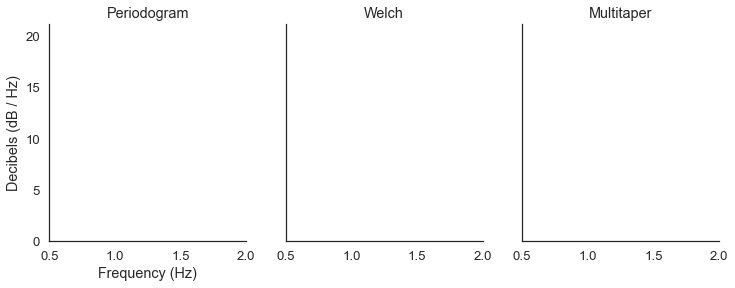

In [41]:
def plot_spectrum_methods(data, sf, window_sec, band=None, dB=False):
    """Plot the periodogram, Welch's and multitaper PSD.

    Requires MNE-Python >= 0.14.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds for Welch's PSD
    dB : boolean
        If True, convert the power to dB.
    """
    from mne.time_frequency import psd_array_multitaper
    from scipy.signal import welch, periodogram
    sns.set(style="white", font_scale=1.2)
    # Compute the PSD
    freqs, psd = periodogram(data, sf)
    freqs_welch, psd_welch = welch(data, sf, nperseg=window_sec*sf)
    psd_mt, freqs_mt = psd_array_multitaper(data, sf, adaptive=True,
                                            normalization='full', verbose=0)
    sharey = False

    # Optional: convert power to decibels (dB = 10 * log10(power))
    if dB:
        psd = 10 * np.log10(psd)
        psd_welch = 10 * np.log10(psd_welch)
        psd_mt = 10 * np.log10(psd_mt)
        sharey = True

    # Start plot
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=sharey)
    # Stem
    sc = 'slategrey'
    ax1.stem(freqs, psd, linefmt=sc, basefmt=" ", markerfmt=" ")
    ax2.stem(freqs_welch, psd_welch, linefmt=sc, basefmt=" ", markerfmt=" ")
    ax3.stem(freqs_mt, psd_mt, linefmt=sc, basefmt=" ", markerfmt=" ")
    # Line
    lc, lw = 'k', 2
    ax1.plot(freqs, psd, lw=lw, color=lc)
    ax2.plot(freqs_welch, psd_welch, lw=lw, color=lc)
    ax3.plot(freqs_mt, psd_mt, lw=lw, color=lc)
    # Labels and axes
    ax1.set_xlabel('Frequency (Hz)')
    if not dB:
        ax1.set_ylabel('Power spectral density (V^2/Hz)')
    else:
        ax1.set_ylabel('Decibels (dB / Hz)')
    ax1.set_title('Periodogram')
    ax2.set_title('Welch')
    ax3.set_title('Multitaper')
    if band is not None:
        ax1.set_xlim(band)
    ax1.set_ylim(ymin=0)
    ax2.set_ylim(ymin=0)
    ax3.set_ylim(ymin=0)
    sns.despine()

# Example: plot the 0.5 - 2 Hz band
plot_spectrum_methods(data, sf, 4, [0.5, 2], dB=True)